In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import colorsys

In [122]:
def RGB2HSI(R, G, B):
    H = np.zeros(R.shape)
    S = np.zeros(R.shape)
    I = np.zeros(R.shape)
      
    eps = 1E-6
    
    for x in range(R.shape[0]):
        for y in range(R.shape[1]):
            r = R[x,y]
            b = B[x,y]
            g = G[x,y]
            
            numer = float(0.5 * ((r - g) + (r - b)))
            denom = float(((r - g)**2 + ((r - b) * (g - b))) ** 0.5)  # when uplifting you can use ** as well!
            if (b <= g):
                h = math.acos(numer / (denom + eps))  # to not divide with 0  !
            if (b > g):
                h = (2*math.pi) - math.acos(numer / (denom + eps))
                #h=h/360
                
            minimum = np.min([r, g, b])            
            s = 1 - 3 * np.divide(minimum, (r + g + b)+eps)
            
            i = float(r + g + b) / float(3)
              
            pix_h = h * (180 / math.pi)
            pix_s = s #* 100
            pix_i = i #* 255
                
            H[x,y] = pix_h/360
            S[x,y] = pix_s
            I[x,y] = pix_i
            
    return H, S, I

In [123]:
# Loads image
image = np.int32(cv2.imread('fruits.jpg'))
IMG = image / 255

print('Image shape is', IMG.shape)

b = IMG[:, :, 0]
g = IMG[:, :, 1]
r = IMG[:, :, 2]


hue, saturation, intensity = RGB2HSI(r,g,b)

Image shape is (615, 757, 3)


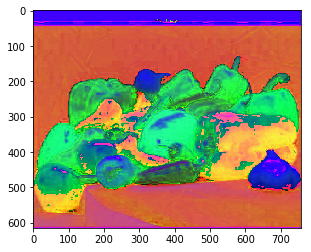

In [124]:
IMG_swap = np.stack([hue,saturation,intensity], axis=2)
IMG_swap.shape

plt.imshow(IMG_swap)

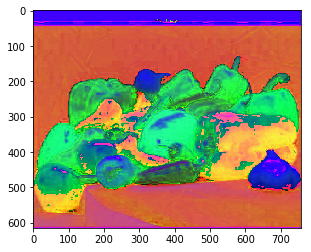

In [125]:
plt.imshow(cv2.merge((hue, saturation, intensity)))

In [126]:
print(np.max(hue))
print(np.max(saturation))
print(np.max(intensity))

print(np.min(hue))

0.999277351260748
1.0
1.0
0.00025414992808515664


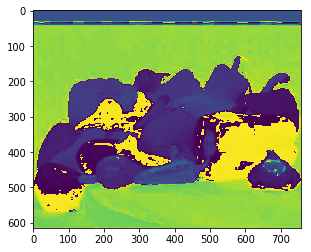

In [64]:
plt.imshow(hue)

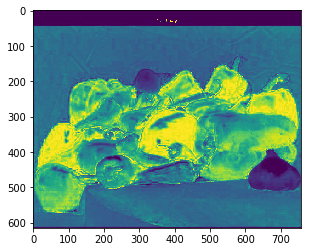

In [65]:
plt.imshow(saturation)

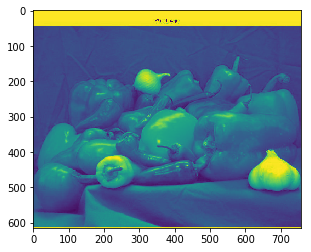

In [66]:
plt.imshow(intensity)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\Mathias\AppData\Local\conda\conda\envs\py36\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


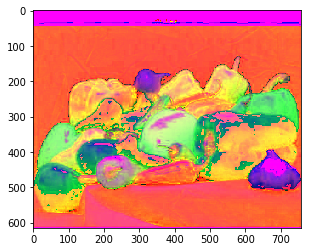

In [57]:
HSI_stack = np.zeros(IMG.shape)
HSI_stack[:,:,0] = hue
HSI_stack[:,:,1] = saturation
HSI_stack[:,:,2] = intensity
plt.imshow(HSI_stack)

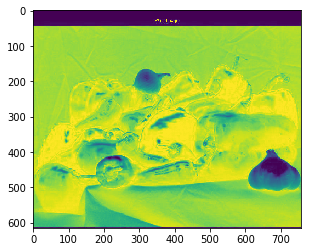

In [40]:
plt.imshow(saturation)

In [9]:
hue.shape
IMG.shape

(194, 259, 3)

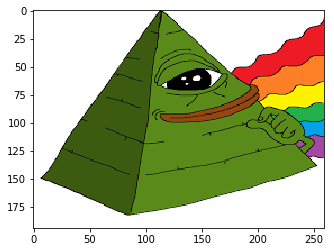

In [20]:
IMG_swap = np.stack([r,g,b], axis=2)
IMG_swap.shape

plt.imshow(IMG_swap)

In [26]:
cv2.imshow('hello', hue)

In [ ]:
if (0 <= pix_r <= 255 and 0 <= pix_g <= 255 and 0 <= pix_b <= 255):
                d = float(R + G + B)
                #r = IMG * float(pix_r) / d  # The normalization for the RGB image needed?
                #g = IMG * float(pix_g) / d
                #b = IMG * float(pix_b) / d
                numer = float(0.5 * ((r - g) + (r - b)))
                denom = float(((r - g) * (r - g) + (r - b) * (g - b)) * math.pow(0.5))  # when uplifting you can use ** as well!
                if (b <= g):
                    h = math.acos(numer / denom + eps)  # to not divide with 0  !
                if (b > g):
                    h = (2 * math.pi) - math.acos(numer / denom)
                s = 1 - (3 * min(r, g, b))
                i = float(R + G + B) / float(3 * 255)
                # The HSI in corrected numbers!
                pix_h = h * (180 / math.pi)
                pix_s = s * 100
                pix_i = i * 255
                
                H[x,y] = pix_h
                S[x,y] = pix_s
                I[x,y] = pix_i

In [ ]:
 if (0 <= R <= 255 and 0 <= G <= 255 and 0 <= B <= 255):
        d = float(R + G + B)
        r = IMG * float(R) / d  # The normalization for the RGB image needed?
        g = IMG * float(G) / d
        b = IMG * float(B) / d
        numer = float(0.5 * ((r - g) + (r - b)))
        denom = float(((r - g) * (r - g) + (r - b) * (g - b)) * math.pow(0.5))  # when uplifting you can use ** as well!
        if (b <= g):
            h = math.acos(numer / denom + eps)  # to not divide with 0  !
        if (b > g):
            h = (2 * math.pi) - math.acos(numer / denom)
        s = 1 - (3 * min(r, g, b))
        i = float(R + G + B) / float(3 * 255)
        # The HSI in corrected numbers!
        H = h * (180 / math.pi)
        S = s * 100
        I = i * 255
        return H, S, I


In [85]:
import cv2
import numpy as np
from math import pi

def BGR_TO_HSI(img):

    with np.errstate(divide='ignore', invalid='ignore'):

        bgr = np.int32(cv2.split(img))

        blue = bgr[0]
        green = bgr[1]
        red = bgr[2]

        intensity = np.divide(blue + green + red, 3)

        minimum = np.minimum(np.minimum(red, green), blue)
        saturation = 1 - 3 * np.divide(minimum, red + green + blue)

        sqrt_calc = np.sqrt(((red - green) * (red - green)) + ((red - blue) * (green - blue)))

        if (green >= blue).any():
            hue = np.arccos((1/2 * ((red-green) + (red - blue)) / sqrt_calc))
        else:
            hue = 2*pi - np.arccos((1/2 * ((red-green) + (red - blue)) / sqrt_calc))

        hue = hue*180/pi

        hsi = cv2.merge((hue, saturation, intensity))
        return hsi

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


C:\Users\Mathias\AppData\Local\conda\conda\envs\py36\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


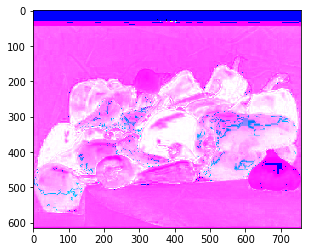

In [86]:
plt.imshow(BGR_TO_HSI(cv2.imread('fruits.jpg')))